# Loading Portfolio data

The `src/portfolio_analysis.py` file contains functions for predefined analyses, however, you can still using the `StockPriceLoader` and `CalculateStockValue` classes directly to load the raw data to do your own independant analysis.

Everyone's portfolio is unique and everyone has slightly different requirements for their analysis. Therefore, you may even want to fork this repository, use the dataloading functions but then adapt for your needs. 

This notebook will give an overview of how to load data from an input data source.

In [2]:
%load_ext autoreload
%autoreload 2

# !pip install nb_black
%load_ext nb_black

&lt;IPython.core.display.Javascript object&gt;

In [3]:
import sys
sys.path.append("..")

&lt;IPython.core.display.Javascript object&gt;

In [4]:
import pandas as pd
import ffn

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from src.data_loader import StockPriceLoader
from src.portfolio_value import CalculateStockValue
from src.portfolio_value import calc_portfolio_value

&lt;IPython.core.display.Javascript object&gt;

## Input data format

The required data input for this analysis is a `csv` file containing rows for each purchase (or disposal) of a stock in your portfolio. An example is given in the `../data/raw/purchase_info.csv` in this repository.

The required columns are:
- `date`: the date of your transaction
- `action`: BUY or SELL
- `company`: the name of the company (this is not sensitive to any further analysis and can be anything of your choosing)
- `yahoo_ticker`: the ticker of the stock on finance.yahoo.com (note this might be different from the actual stock market ticker)
- `currency`: the currency the stock price is denominated in
- `num_shares`: the number of shares involved in the transaction
- `stock_price_usd`: the stock price you bought the stock at on that day
- `trading_costs_usd`: the trading costs incurred
- `total_usd`: the total cost of the transaction
- `total_shares_held`: the total number of shares held after the transaction

In [7]:
pd.read_csv("../data/raw/purchase_info.csv")

,date,action,company,yahoo_ticker,currency,num_shares,stock_price_usd,trading_costs_usd,total_usd,total_shares_held
0,17/07/2019,BUY,Nvidia,NVDA,USD,39,166.6700,4.95,6505.08,39
1,17/07/2019,BUY,Intel,INTC,USD,180,49.9100,4.95,8988.75,180
2,17/07/2019,BUY,Applied Materials,AMAT,USD,268,45.9151,4.95,12310.20,268
3,17/07/2019,BUY,MKS Instruments,MKSI,USD,120,76.7449,4.95,9214.34,120
4,17/07/2019,BUY,Synopsys,SNPS,USD,68,136.8084,4.95,9307.92,68
5,17/07/2019,BUY,SOXX ETF,SOXX,USD,75,204.2607,4.95,15324.50,75
6,26/11/2019,SELL,Nvidia,NVDA,USD,5,217.0000,4.95,1089.95,34
7,25/03/2020,BUY,Nvidia,NVDA,USD,10,205.7500,4.95,2062.45,44


&lt;IPython.core.display.Javascript object&gt;

## Load Stock Prices

You are able to load a dataframe of daily closing stock prices for all stock tickers present in the `purchase_info.csv`, starting from the earliest date of your first position, using the `StockPriceLoader` class.

Note the default location for the input data file is: `../data/raw/purchase_info.csv`, however, you can specify your own location using the `input_data_source` argument.

The `StockPriceLoader` class uses the `ffn` library to load the stock prices for free from Yahoo ([see ffn library for more details](https://pmorissette.github.io/ffn/)).

In [5]:
# load stock prices of tickers in your purchase_info csv file
prices = StockPriceLoader()

&lt;IPython.core.display.Javascript object&gt;

In [6]:
# __repr__ gives a list of tickers and the starting date
prices

Tickers: [&#39;NVDA&#39;, &#39;INTC&#39;, &#39;AMAT&#39;, &#39;MKSI&#39;, &#39;SNPS&#39;, &#39;SOXX&#39;]
Start Date: 2019-07-17 00:00:00

&lt;IPython.core.display.Javascript object&gt;

In [7]:
# show stock prices
prices.daily_stock_prices.head(10)

,NVDA,INTC,AMAT,MKSI,SNPS,SOXX
Date,,,,,,
2019-07-17,169.188049,47.952766,45.377625,77.286873,135.750000,201.027237
2019-07-18,169.656601,48.486755,47.292084,79.584183,136.039993,203.936676
2019-07-19,167.921951,48.807159,46.938648,78.425613,134.990005,203.700790
2019-07-22,170.793091,49.855732,49.805428,82.247879,135.419998,207.593140
2019-07-23,175.119736,50.244091,50.099960,83.960953,136.160004,210.256882
2019-07-24,178.110519,51.380039,51.189732,88.664520,137.619995,216.665527
2019-07-25,172.846756,50.642159,49.893784,85.703758,137.500000,213.028702
2019-07-26,174.531570,50.088745,49.815247,86.713776,137.089996,212.969757
2019-07-29,174.282349,50.981976,49.746525,87.020744,136.210007,213.549667


&lt;IPython.core.display.Javascript object&gt;

This can be used at the very basic level to analyse the general performance of each stock (regardless of your position)

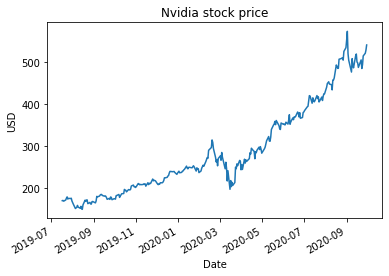

&lt;IPython.core.display.Javascript object&gt;

In [8]:
prices.daily_stock_prices['NVDA'].plot()
plt.title("Nvidia stock price")
plt.ylabel("USD")
plt.show()


## Individual Stock Position Analysis

You can use the `CalculateStockValue` class in `src/portfolio_value.py` to calculate, for any individual stock in the input data csv, the daily number of shares owned and the USD value of the holding at any date since the first purchase.

The `CalculateStockValue` class inherits from the `StockPriceLoader` class so you don't need to reload all the stock prices - all you need to provide is a ticker [and input_data_source path (optional)].

The class will create an object with all of the same attributes as the `StockPriceLoader`, but will also have the following additional stock specific attributes:
- `stock_purchase_info`: the buy/sell actions for the specific stock
- `daily_stock_price`: the daily stock price for the stock
- `metadata`: the company name, ticker and currency for the stock
- `daily_shares_owned`: timeseries with the daily number of shares owned for the stock
- `daily_value_usd`: timeseries with the overall USD value of your current holding for the stock

An example is given below for Nvidia:

In [15]:
example_ticker = 'NVDA'

# automatically loads purchase info from ../data/raw/purchase_info.csv, however, you can specify your own file name and location
nvda_stock_value = CalculateStockValue(ticker='NVDA')

#list available properties
for key in vars(nvda_stock_value):
    print(key)

# example: list all purchases/disposals for nvda
display(nvda_stock_value.stock_purchase_info)

input_data_source
tickers
start_date
positions
daily_stock_prices
stock_purchase_info
daily_stock_price
datetime_index
metadata
daily_shares_owned
daily_value_usd


,date,action,company,yahoo_ticker,currency,num_shares,stock_price_usd,trading_costs_usd,total_usd,total_shares_held
0,2019-07-17,BUY,Nvidia,NVDA,USD,39,166.67,4.95,6505.08,39
6,2019-11-26,SELL,Nvidia,NVDA,USD,5,217.00,4.95,1089.95,34
7,2020-03-25,BUY,Nvidia,NVDA,USD,10,205.75,4.95,2062.45,44


&lt;IPython.core.display.Javascript object&gt;

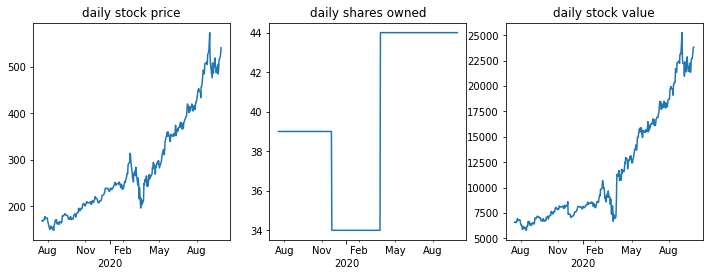

&lt;IPython.core.display.Javascript object&gt;

In [16]:
# plot stock price, number of shares owned and USD value of the position overtime
years= mdates.YearLocator()
yearsFmt = mdates.DateFormatter('\n%Y')
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%b') 

plot_properties = [nvda_stock_value.daily_stock_price,nvda_stock_value.daily_shares_owned, nvda_stock_value.daily_value_usd]
plot_titles = ['daily stock price', 'daily shares owned','daily stock value']
_, axs = plt.subplots(ncols=3,figsize=(12,4))
for i, (property, title) in enumerate(zip(plot_properties,plot_titles)):
    axs[i].plot(property)
    axs[i].xaxis.set_minor_locator(months)
    axs[i].xaxis.set_minor_formatter(monthsFmt)
    axs[i].xaxis.set_major_locator(years)
    axs[i].xaxis.set_major_formatter(yearsFmt)

    axs[i].set_title(title)

plt.show()


There is also a convenience function `calc_portfolio_value` which will create a `CalculateStockValue` object for each stock and also combine the daily values into a single dataframe.

The function returns:
- the daily stock prices for all tickers in a single dataframe
- a dictionary containing the `CalculateStockValue` objects for each ticker
- daily value (USD) of each stock combined in a single dataframe
- daily shares owned of each stock combined in a single dataframe

In [17]:
stock_prices, stocks, combined_daily_value, combined_daily_shares_owned = calc_portfolio_value()

&lt;IPython.core.display.Javascript object&gt;

In [18]:
combined_daily_shares_owned

,NVDA,INTC,AMAT,MKSI,SNPS,SOXX
2019-07-17,39.0,180.0,268.0,120.0,68.0,75.0
2019-07-18,39.0,180.0,268.0,120.0,68.0,75.0
2019-07-19,39.0,180.0,268.0,120.0,68.0,75.0
2019-07-20,39.0,180.0,268.0,120.0,68.0,75.0
2019-07-21,39.0,180.0,268.0,120.0,68.0,75.0
...,...,...,...,...,...,...
2020-09-27,44.0,180.0,268.0,120.0,68.0,75.0
2020-09-28,44.0,180.0,268.0,120.0,68.0,75.0
2020-09-29,44.0,180.0,268.0,120.0,68.0,75.0
2020-09-30,44.0,180.0,268.0,120.0,68.0,75.0


&lt;IPython.core.display.Javascript object&gt;

In [19]:
combined_daily_value

,NVDA,INTC,AMAT,MKSI,SNPS,SOXX
2019-07-17,6598.333923,8631.497955,12161.203369,9274.424744,9231.000000,15077.042770
2019-07-18,6616.607437,8727.615967,12674.278442,9550.101929,9250.719543,15295.250702
2019-07-19,6548.956100,8785.288696,12579.557724,9411.073608,9179.320374,15277.559280
2019-07-20,6548.956100,8785.288696,12579.557724,9411.073608,9179.320374,15277.559280
2019-07-21,6548.956100,8785.288696,12579.557724,9411.073608,9179.320374,15277.559280
...,...,...,...,...,...,...
2020-09-27,22657.800537,8989.199753,15605.639877,12904.800110,14178.000000,22143.750000
2020-09-28,22941.601074,9257.400055,15908.480164,13258.799744,14459.519958,22753.500366
2020-09-29,23277.321289,9214.199753,15986.200409,13288.799744,14437.760498,22806.749725
2020-09-30,23813.678711,9320.399780,15932.600204,13107.600403,14550.639709,22845.748901


&lt;IPython.core.display.Javascript object&gt;